In [2]:
# Stage 1: Student Modeling & Knowledge Graph for OOP Adaptive Learning
#This notebook:
 #- Reads student marks from Excel
 #- Maps each question to a topic
 #- Calculates topic-wise proficiency
 #- Classifies topics into Weak/Moderate/Strong
 #- Exports profiles as JSON for adaptive learning engine


In [22]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

In [27]:
import pandas as pd

In [4]:
# Question-to-Topic Mapping
question_topic_map = {
    "Q1": "Principles of OOP",       # Basic Java & Methods
    "Q2": "Principles of OOP",       # Strings
    "Q3": "Classes & Objects",       # Encapsulation
    "Q4": "Inheritance & Polymorphism",
    "Q5": "OOP Core Concepts",       # Constructors
    "Q6": "Collections & Generics"
}

# Max marks per question
max_marks = {
    "Q1": 5,
    "Q2": 5,
    "Q3": 10,
    "Q4": 10,
    "Q5": 10,
    "Q6": 10
}


In [24]:
# Load dataset
file_path = r"E:\Capstone\OOP_Adaptive_Learning\data\full_student_marks.xlsx"  # Adjust path if needed
df = pd.read_excel(file_path)

# Display first few rows
df.head()


,StudentID,Q1,Q2,Q3,Q4,Q5,Q6,Total
0,400,2.0,0.0,0.0,0.0,2.0,2.0,6.0
1,401,3.0,0.0,4.0,0.0,1.0,2.0,10.0
2,402,2.0,0.0,2.0,0.0,6.0,1.0,11.0
3,403,4.5,1.0,8.0,0.0,2.0,2.0,17.5
4,404,3.0,0.0,8.0,0.0,1.0,0.0,12.0


In [25]:
# Validate expected columns
expected_cols = ["StudentID", "Q1", "Q2", "Q3", "Q4", "Q5", "Q6"]

for col in expected_cols:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col} in Excel file")

print("✅ All required columns are present.")


✅ All required columns are present.


In [26]:
# Question-to-Topic Mapping
question_topic_map = {
    "Q1": "Principles of OOP",
    "Q2": "Principles of OOP",
    "Q3": "Classes & Objects",
    "Q4": "Inheritance & Polymorphism",
    "Q5": "OOP Core Concepts",
    "Q6": "Collections & Generics"
}

# Max marks per question
max_marks = {
    "Q1": 5,
    "Q2": 5,
    "Q3": 10,
    "Q4": 10,
    "Q5": 10,
    "Q6": 10
}

# Initialize structures
student_profiles = []
topic_summary = {
    "Principles of OOP": 0,
    "Classes & Objects": 0,
    "Inheritance & Polymorphism": 0,
    "OOP Core Concepts": 0,
    "Collections & Generics": 0
}

# Compute topic proficiency for each student
for _, row in df.iterrows():
    student_id = row["StudentID"]
    topic_scores = {}

    # Calculate percentage per topic
    for q, topic in question_topic_map.items():
        score = row[q]
        pct = (score / max_marks[q]) * 100
        topic_scores.setdefault(topic, []).append(pct)

    # Average scores for topics that have multiple questions
    for topic in topic_scores:
        topic_scores[topic] = sum(topic_scores[topic]) / len(topic_scores[topic])

    # Classify topics into Weak, Moderate, Strong
    weak, moderate, strong = [], [], []
    for topic, pct in topic_scores.items():
        if pct < 40:
            weak.append(topic)
            topic_summary[topic] += 1
        elif pct < 70:
            moderate.append(topic)
        else:
            strong.append(topic)

    student_profiles.append({
        "student_id": int(student_id),
        "weak_topics": weak,
        "moderate_topics": moderate,
        "strong_topics": strong
    })


In [28]:
import json
import os

# Save JSON
output_json_path = "../data/student_profiles.json"
with open(output_json_path, "w") as f:
    json.dump(student_profiles, f, indent=4)

# Save summary
summary_path = "../outputs/summary.txt"
os.makedirs("../outputs", exist_ok=True)
with open(summary_path, "w") as f:
    f.write("Weakness Summary (Number of Students Weak in Each Topic):\n")
    for topic, count in topic_summary.items():
        f.write(f"{topic}: {count}\n")

print("Student profiles saved at:", output_json_path)
print("Summary saved at:", summary_path)


Student profiles saved at: ../data/student_profiles.json
Summary saved at: ../outputs/summary.txt


In [29]:
# Display first student profile
import pprint
pprint.pprint(student_profiles[0])

# Display summary counts
topic_summary

{'moderate_topics': [],
 'strong_topics': [],
 'student_id': 400,
 'weak_topics': ['Principles of OOP',
                 'Classes & Objects',
                 'Inheritance & Polymorphism',
                 'OOP Core Concepts',
                 'Collections & Generics']}


{'Principles of OOP': 368,
 'Classes & Objects': 396,
 'Inheritance & Polymorphism': 1997,
 'OOP Core Concepts': 1340,
 'Collections & Generics': 1467}

In [30]:
!pip install networkx matplotlib

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

In [32]:
# Topics
topics = [
    "Principles of OOP",
    "Classes & Objects",
    "Inheritance & Polymorphism",
    "OOP Core Concepts",
    "Collections & Generics"
]

# Dependencies based on syllabus
dependencies = [
    ("Principles of OOP", "Classes & Objects"),
    ("Classes & Objects", "Inheritance & Polymorphism"),
    ("Inheritance & Polymorphism", "OOP Core Concepts"),
    ("OOP Core Concepts", "Collections & Generics")
]

In [34]:
# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(topics)
G.add_edges_from(dependencies)

# Save the graph to file for later use
nx.write_gml(G, "../data/knowledge_graph.gml")
print("Knowledge Graph saved as knowledge_graph.gml")

Knowledge Graph saved as knowledge_graph.gml


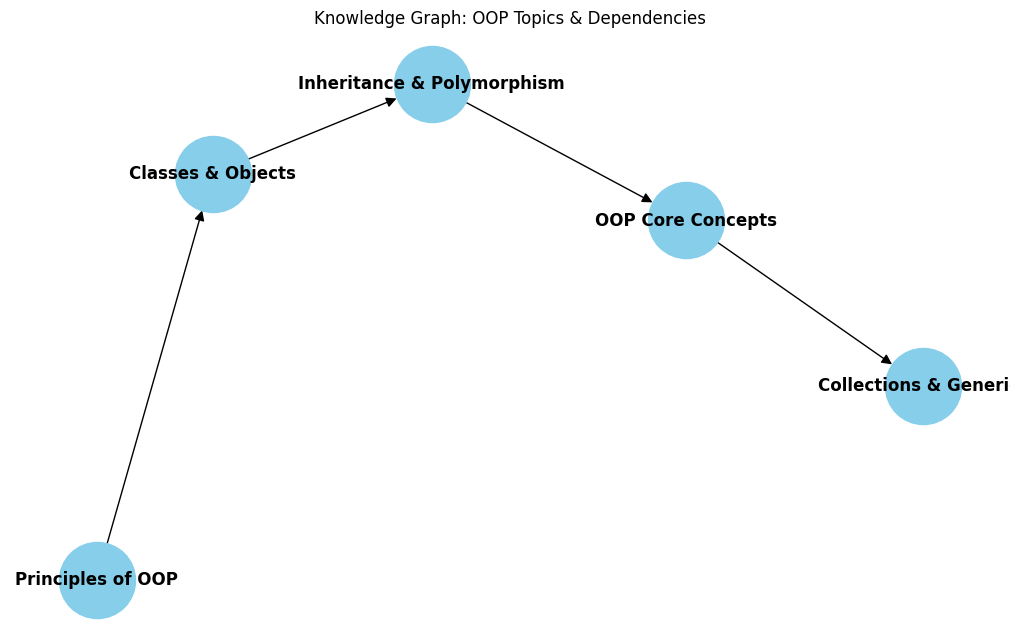

In [35]:
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=3000, font_size=12, font_weight="bold", arrows=True, arrowstyle='-|>', arrowsize=15)
plt.title("Knowledge Graph: OOP Topics & Dependencies")
plt.show()

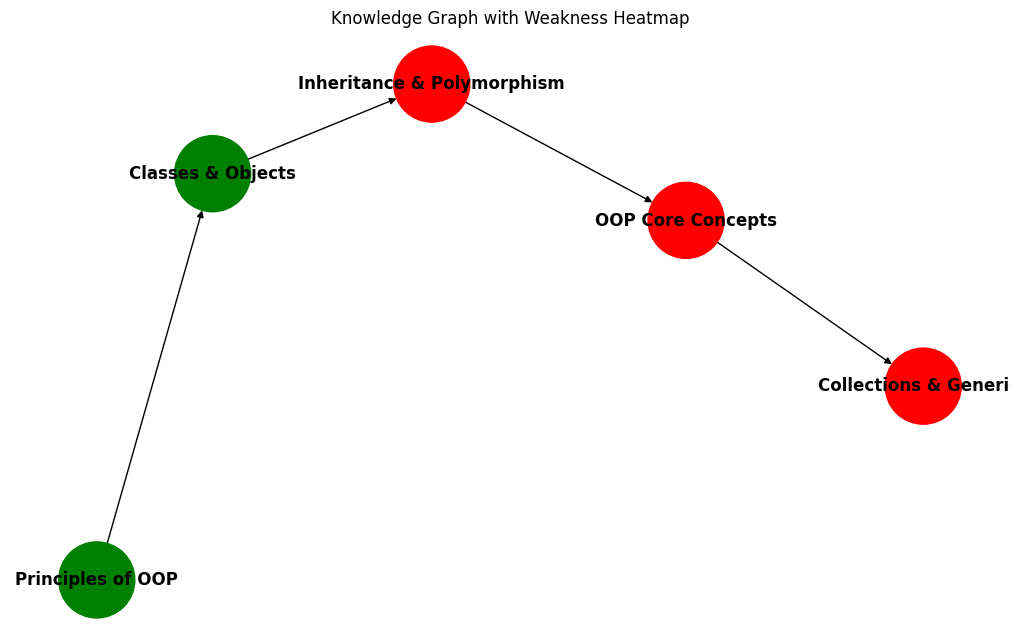

In [36]:
color_map = []
for node in G.nodes():
    if topic_summary[node] > 1000:   # High weakness
        color_map.append("red")
    elif topic_summary[node] > 500:  # Medium weakness
        color_map.append("orange")
    else:
        color_map.append("green")

plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=3000, font_size=12, font_weight="bold", arrows=True)
plt.title("Knowledge Graph with Weakness Heatmap")
plt.show()
